# Line, Circle and Blob Detection

- Houghlines
- Hough Circles
- Blob Detection

---
### Imports and Helper-functions

In [1]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [179]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH = get_random_img_path(skip=["weather", "gem"])
IMG_PATH

'../../res/img/flickr30k_images/flickr30k_images/4782649533.jpg'

---
### Loading data

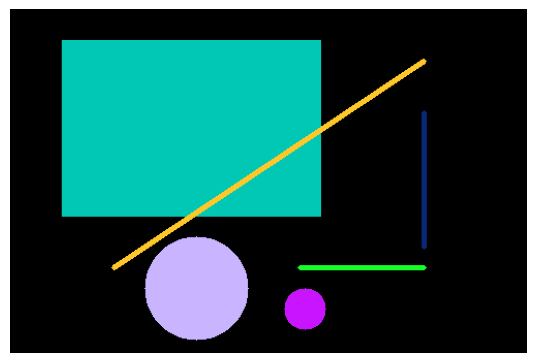

In [220]:
img = cv2.imread(IMG_PATH)
original_img = img.copy()
cv2.rectangle(img, (0, 0), (img.shape[1], img.shape[0]), (0, 0, 0), -1)
cv2.rectangle(img, (50, 30), (300, 200), (180, 200, 0), -1)
cv2.line(img, (100, 250), (400, 50), (40, 200, 255), 3)
cv2.line(img, (280, 250), (400, 250), (40, 255, 20), 3)
cv2.line(img, (400, 100), (400, 230), (120, 40, 10), 3)
cv2.circle(img, (285, 290), 20, (255, 20, 200), -1)
cv2.circle(img, (180, 270), 50, (255, 180, 200), -1)
imshow(img)

---
### Line Detection with Hough Lines

The Hough transform takes a binary edge map as input and attempts to locate edges placed as straight lines. The idea of the Hough transform is, that every edge point in the edge map is transformed to all possible lines that could pass through that point.

```python
cv2.HoughLines(binarized/thresholded image, 𝜌 accuracy, 𝜃 accuracy, threshold)
```

Threshold here is the minimum vote for it to be considered a line

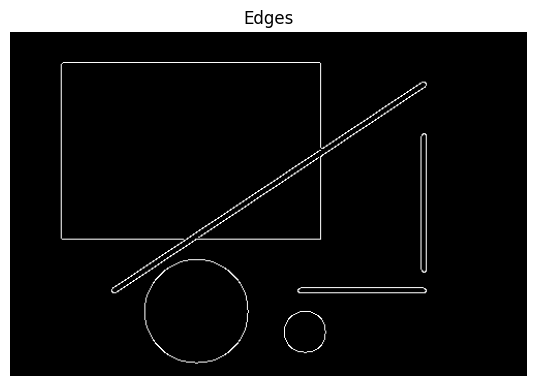

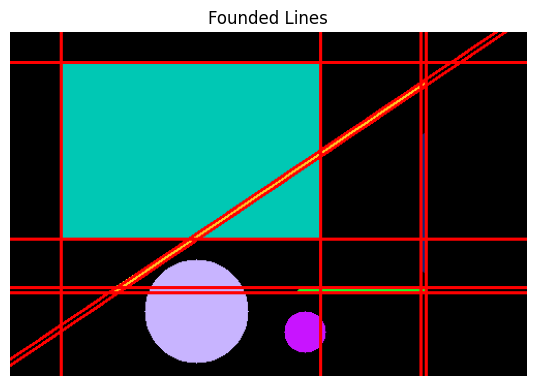

In [221]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edge_map = cv2.Canny(gray_img, 100, 100)
imshow(edge_map, "Edges")

lines = cv2.HoughLines(edge_map, 1, np.pi/180, 120)

copy_img = img.copy()
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    
    length = 1000
    x1 = int(x0 + length*(-b))
    y1 = int(y0 + length*(a))
    x2 = int(x0 - length*(-b))
    y2 = int(y0 - length*(a))
    cv2.line(copy_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

imshow(copy_img, "Founded Lines")

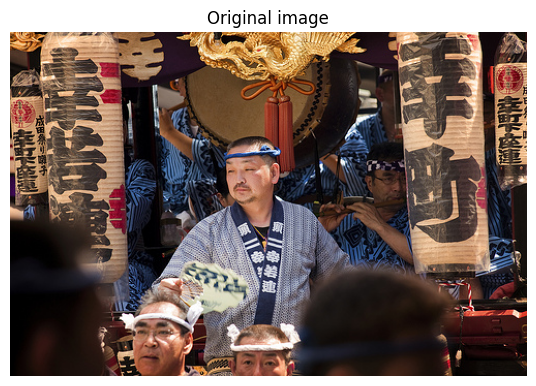

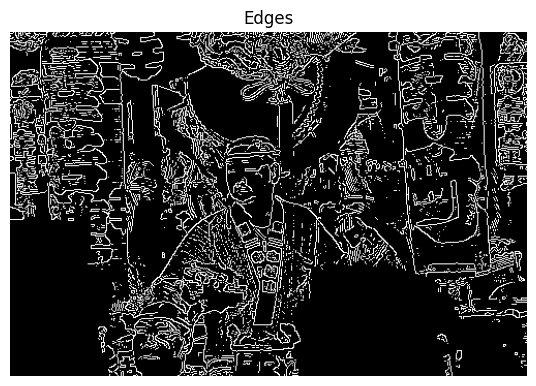

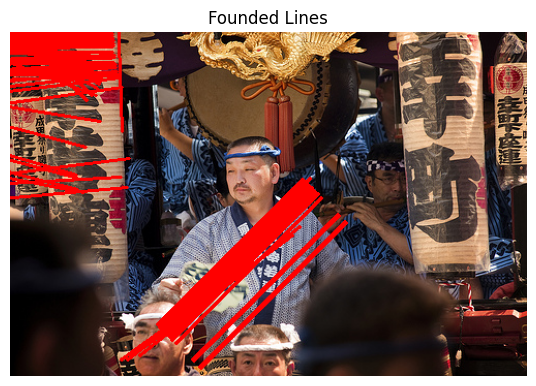

In [222]:
imshow(original_img, "Original image")
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
edge_map = cv2.Canny(gray_img, 200, 200)
imshow(edge_map, "Edges")

lines = cv2.HoughLines(edge_map, 1, np.pi/180, 120)

copy_img = original_img.copy()
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    
    length = 100
    x1 = int(x0 + length*(-b))
    y1 = int(y0 + length*(a))
    x2 = int(x0 - length*(-b))
    y2 = int(y0 - length*(a))
    cv2.line(copy_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

imshow(copy_img, "Founded Lines")

---
### Probabilistic Hough Lines
A Hough Transform is considered probabilistic if it uses random sampling of the edge points. These algorithms can be divided based on how they map image space to parameter space.

```python
cv2.HoughLinesP(binarized image, 𝜌 accuracy, 𝜃 accuracy, threshold, minimum line length, max line gap)
```

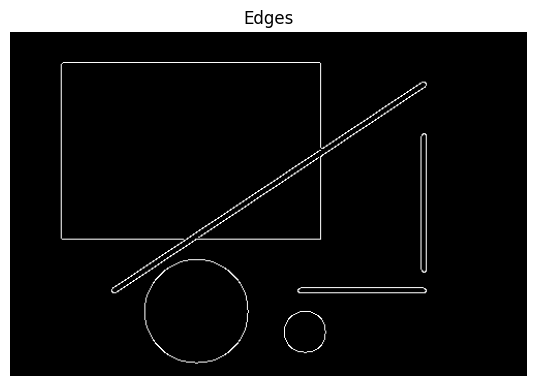

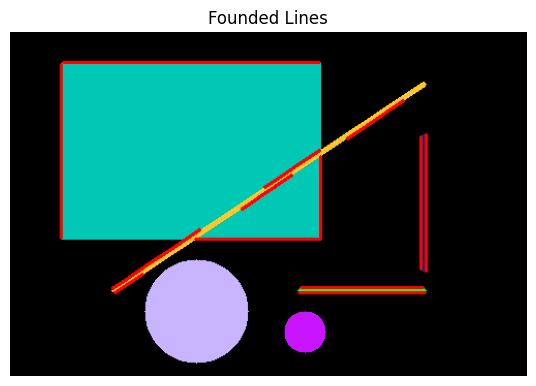

In [223]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edge_map = cv2.Canny(gray_img, 100, 100)
imshow(edge_map, "Edges")

lines = cv2.HoughLinesP(edge_map, 1, np.pi/180, 120, 3, 25)

copy_img = img.copy()
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(copy_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

imshow(copy_img, "Founded Lines")

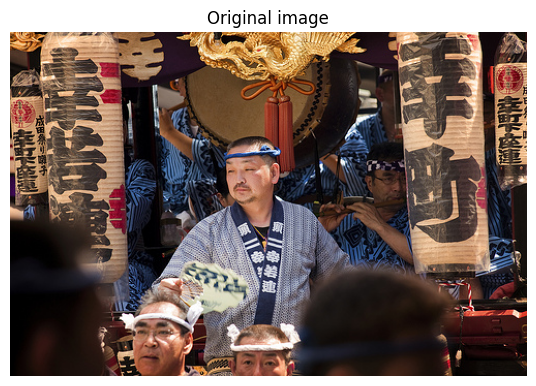

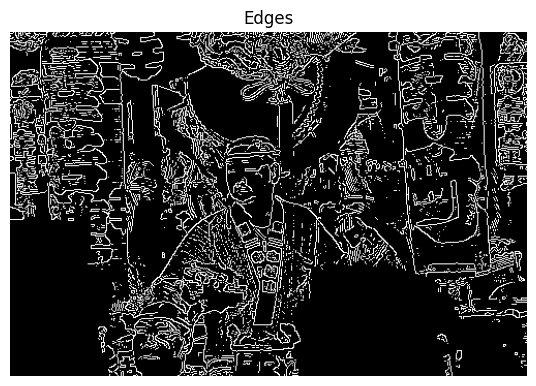

TypeError: 'NoneType' object is not iterable

In [224]:
imshow(original_img, "Original image")
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
edge_map = cv2.Canny(gray_img, 200, 200)
imshow(edge_map, "Edges")

lines = cv2.HoughLinesP(edge_map, 1, np.pi/180, 120, 3, 25)

copy_img = img.copy()
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(copy_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

imshow(copy_img, "Founded Lines")

---
### Circle Detection with Hough Cirlces

```python
cv2.HoughCircles(image, method, dp, MinDist, param1, param2, minRadius, MaxRadius)
```

- Method - currently only cv2.HOUGH_GRADIENT available
- dp - Inverse ratio of accumulator resolution
- MinDist - the minimum distance between the center of detected circles
- param1 - Gradient value used in the edge detection
- param2 - Accumulator threshold for the HOUGH_GRADIENT method (lower allows more circles to be detected (false positives))
- minRadius - limits the smallest circle to this size (via radius)
- MaxRadius - similarly sets the limit for the largest circles

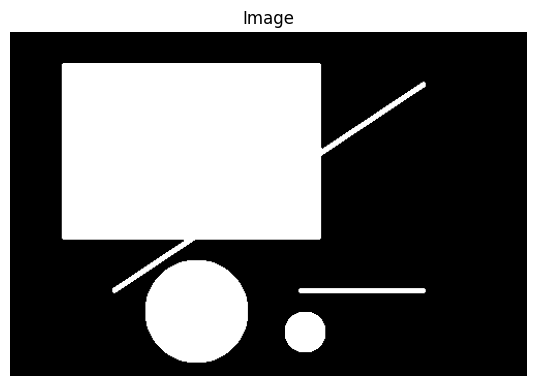

TypeError: 'NoneType' object is not subscriptable

In [251]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur_img = cv2.medianBlur(gray_img, 3)
t, t_img = cv2.threshold(blur_img, 100, 255, cv2.THRESH_BINARY)
imshow(t_img, "Image")

circles = cv2.HoughCircles(t_img, cv2.HOUGH_GRADIENT, 0.5, 5)

copy_img = img.copy()
for circle in circles[0, :]:
    # outer circle
    cv2.circle(copy_img, (circle[0], circle[1]), circle[3], (0, 0, 255), 8)

    # center
    cv2.circle(copy_img, (circle[0], circle[1]), 2, (0, 0, 255), 8)

imshow(copy_img, "Founded Circles")

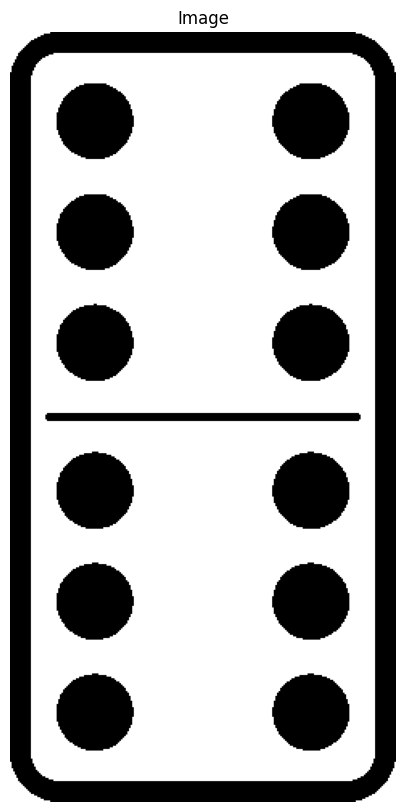

TypeError: 'NoneType' object is not subscriptable

In [256]:
img_2 = cv2.imread("../../res/img/course_img/domino.png")
gray_img = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
blur_img = cv2.medianBlur(gray_img, 3)
t, t_img = cv2.threshold(blur_img, 100, 255, cv2.THRESH_BINARY)
imshow(t_img, "Image")

circles = cv2.HoughCircles(t_img, cv2.HOUGH_GRADIENT, 1.2, 3)

copy_img = img_2.copy()
for circle in circles[0, :]:
    # outer circle
    cv2.circle(copy_img, (circle[0], circle[1]), circle[3], (0, 0, 255), 8)

    # center
    cv2.circle(copy_img, (circle[0], circle[1]), 2, (0, 0, 255), 8)

imshow(copy_img, "Founded Circles")

---
### Blob Detection

Blobs are circular areas.

```python
cv2.drawKeypoints(input image, keypoints, blank_output_array, color, flags)
```

flags:
- cv2.DRAW_MATCHES_FLAGS_DEFAULT
- cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
- cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
- cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS

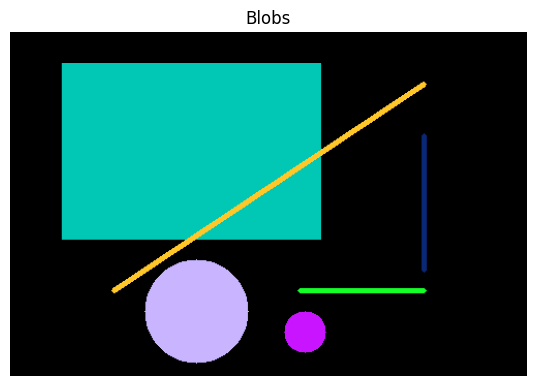

In [254]:
detector = cv2.SimpleBlobDetector_create()

keypoints = detector.detect(img)
blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(img, keypoints, blank, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DEFAULT)

imshow(blobs, "Blobs")

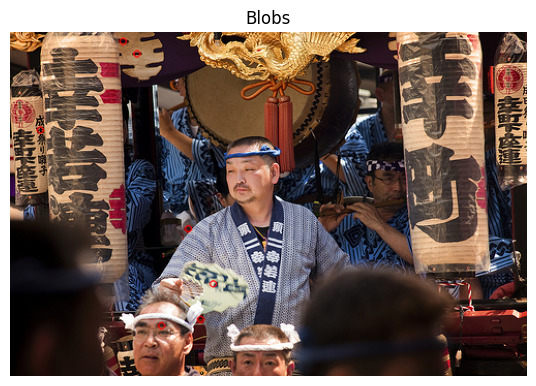

In [255]:
detector = cv2.SimpleBlobDetector_create()

keypoints = detector.detect(original_img)
blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(original_img, keypoints, blank, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DEFAULT)

imshow(blobs, "Blobs")

---